In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

the first 5 rows of the data are:
    城市名称    年份  urbanizationRate
0  city1  2007                48
1  city1  2008                49
2  city1  2009                50
3  city1  2010                51
4  city1  2011                53

the number of cities is:   40
     城市名称    年份  urbanizationRate
0   city1  2007                48
1   city1  2008                49
2   city1  2009                50
3   city1  2010                51
4   city1  2011                53
5   city1  2012                53
6   city1  2013                55
7   city1  2014                56
8   city1  2015                57
9   city1  2016                59
10  city1  2017                61
11  city1  2018                62
12  city1  2019                64
13  city1  2020                65
14  city1  2021                66
15  city1  2022                66
      城市名称    年份  urbanizationRate
112  city2  2007                67
111  city2  2008                67
110  city2  2009                68
109  city2  2010   

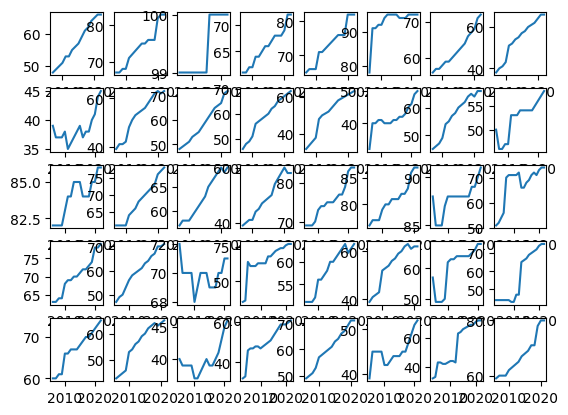

In [3]:
# 城镇化率处理
urbanization = pd.read_excel('data/dataA/城镇化率.xlsx')
# 查看数据前5行
print("the first 5 rows of the data are:")
print(urbanization.head())
# 按照城市名称分组并排序
groups = urbanization.groupby('城市名称',sort=True)
groups = sorted(groups,key=lambda x:int(x[1]['城市名称'].values[0][4:]))
print(f"\nthe number of cities is:   {len(groups)}")
for i,(name,group) in enumerate(groups):
  plt.subplot(5,8,i+1)
  group = group.sort_values(by='年份')
  print(group)
  # 绘制城镇化率变化曲线
  plt.plot(group['年份'],group['urbanizationRate'],label=name)
plt.show()
# groups重组回DataFrame
urbanization = pd.concat([group for name,group in groups])
urbanization.to_csv('data/dataA/urbanization.csv',index=False)

In [4]:
# 工资水平处理
wages = pd.read_excel('data/dataA/工资水平.xlsx')
# 查看数据前5行
print("the first 5 rows of the data are:")
print(wages.head())
# 使用 melt() 将数据转换为长格式
value_vars=['city'+str(i) for i in range(1,41)]
wages_melted = wages.melt(id_vars=['averageWage'], 
                    value_vars=value_vars,
                    var_name='city', 
                    value_name='wage')
print(wages_melted.head())
wages_melted.rename(columns={'averageWage':'年份','city':'城市名称'},inplace=True)
wages_melted['年份'] = wages_melted['年份'].apply(lambda x:int(x[:4]))
wages_melted = wages_melted[['城市名称','年份','wage']]
wages_melted.to_csv('data/dataA/wages.csv',index=False)


the first 5 rows of the data are:
  averageWage    city1  city2    city3  city4  city5    city6    city7  city8  \
0       2001年  10340.0  11984  23036.0  11504  11776  12496.0  11460.0   7976   
1       2002年  13044.0  13780  25940.0  14732  13668  14220.0  14728.0   8948   
2       2003年  16648.0  15796  28216.0  16688  15920  15872.0  16860.0   9852   
3       2004年  19968.0  18928  30608.0  18776  19788  17640.0  19692.0  10800   
4       2005年  22024.0  22124  31928.0  22248  22508  19560.0  21576.0  12168   

   city9  ...   city31  city32  city33  city34   city35  city36  city37  \
0   8216  ...   9100.0    9300   12496    7736   7080.0    6872    9732   
1   9472  ...  10260.0   10532   15172    8608   9516.0    7668   10760   
2  10380  ...  11168.0   12020   17240    9688  10516.0    9188   12004   
3  12436  ...  12404.0   13400   18912   10616  12032.0   10508   13800   
4  14528  ...  13736.0   15080   19576   11948  13580.0   12868   15732   

    city38  city39  city40  

In [5]:
# 就业信息处理
xls = pd.ExcelFile('data/dataA/就业信息.xlsx')
unemployment = xls.parse(sheet_name='城镇失业率')
# 查看数据前5行
print("the first 5 rows of the data are:")
print(unemployment.head())
# 按照城市名称分组并排序
groups = unemployment.groupby('城市名称',sort=True)
groups = sorted(groups,key=lambda x:int(x[1]['城市名称'].values[0][4:]))
# groups重组回DataFrame
unemployment = pd.concat([group for name,group in groups])
unemployment = unemployment[['城市名称','年份','unemploymentRate']]
unemployment.to_csv('data/dataA/unemployment.csv',index=False)

# 从业人员数据处理
employment = xls.parse(sheet_name='从业人员数')
groups = employment.groupby('城市名称',sort=True)
groups = sorted(groups,key=lambda x:int(x[1]['城市名称'].values[0][4:]))
new_groups = []
for name,group in groups:
  group_means = group.groupby('年份')['employeesNumber'].mean().reset_index()
  group_means.insert(0,'城市名称',name)
  new_groups.append((name,group_means))
# groups重组回DataFrame
employment = pd.concat([group.sort_values('年份') for name,group in new_groups])
employment.to_csv('data/dataA/employment.csv',index=False)

# 第一、二、三产业就业人数处理
industry = xls.parse(sheet_name='第一、二、三产业就业人数')
groups = industry.groupby('城市名称',sort=True)
groups = sorted(groups,key=lambda x:int(x[1]['城市名称'].values[0][4:]))
# groups重组回DataFrame
industry = pd.concat([group.sort_values('年份') for name,group in groups])
industry.to_csv('data/dataA/industry.csv',index=False)


the first 5 rows of the data are:
     年份   城市名称  unemploymentRate
0  2001  city1               3.0
1  2002  city1               4.0
2  2003  city1               4.0
3  2005  city1               4.0
4  2006  city1               4.0


In [6]:
# 年龄结构处理
ageStructure = pd.read_excel('data/dataA/年龄结构.xlsx')
# 查看数据前5行
print("the first 5 rows of the data are:")
print(ageStructure.head())
ageStructure.rename(columns={'城市':'城市名称'},inplace=True)
# 按照城市名称分组并排序
groups = ageStructure.groupby('城市名称',sort=True)
groups = sorted(groups,key=lambda x:int(x[1]['城市名称'].values[0][4:]))
# groups重组回DataFrame
ageStructure = pd.concat([group.sort_values(by='年份') for name,group in groups])
ageStructure = ageStructure[['城市名称','年份','0-14','15-64','65+']]
ageStructure.to_csv('data/dataA/ageStructure.csv',index=False)

the first 5 rows of the data are:
       城市    年份  0-14  15-64   65+
0   city1  2020    40  225.0  72.0
1   city1  2010    34  209.0  47.0
2   city1  2000    49  178.0  36.0
3  city10  2020    40  157.0  53.0
4  city10  2010    36  141.0  38.0


In [7]:
# 人口规模处理
population = pd.read_excel('data/dataA/人口规模.xlsx')
# 查看数据前5行
print("the first 5 rows of the data are:")
print(population.head())
population.rename(columns={'城市':'城市名称'},inplace=True)
# 按照城市名称分组并排序
groups = population.groupby('城市名称',sort=True)
groups = sorted(groups,key=lambda x:int(x[1]['城市名称'].values[0][4:]))
# groups重组回DataFrame
population = pd.concat([group.sort_values(by='年份') for name,group in groups])
population = population[['城市名称','年份','常住人口（万人）','户籍人口（万人）']]
population.to_csv('data/dataA/population.csv',index=False)


the first 5 rows of the data are:
    城市名称    年份  常住人口（万人）  户籍人口（万人）
0  city1  2021     337.0     268.0
1  city1  2020     306.0     268.0
2  city1  2019     303.0     267.0
3  city1  2018     300.0     266.0
4  city1  2017     298.0     265.0


In [8]:
# 人口密度处理
populationDensity = pd.read_excel('data/dataA/人口密度.xlsx')
# 查看数据前5行
print("the first 5 rows of the data are:")
print(populationDensity.head())
# 按照城市名称分组并排序
groups = populationDensity.groupby('城市名称',sort=True)
groups = sorted(groups,key=lambda x:int(x[1]['城市名称'].values[0][4:]))
# groups重组回DataFrame
populationDensity = pd.concat([group.sort_values(by='年份') for name,group in groups])
populationDensity = populationDensity[['城市名称','年份','人口密度（人/平方公里）']]
populationDensity.to_csv('data/dataA/populationDensity.csv',index=False)

the first 5 rows of the data are:
     年份   城市名称  人口密度（人/平方公里）
0  2022  city1           588
1  2021  city1           587
2  2020  city1           581
3  2019  city1           528
4  2018  city1           522


In [9]:
# 生活水平处理
# disposableIcome/人均可支配收入
xls = pd.ExcelFile('data/dataA/生活水平.xlsx')
disposableIcome = xls.parse(sheet_name='人均可支配收入')
# 查看数据前5行
print("the first 5 rows of the data are:")
print(disposableIcome.head())
# 使用 melt() 将数据转换为长格式
value_vars=[i for i in range(2015,2023)]
disposableIcome = disposableIcome.melt(id_vars=['城市名称'], 
                    value_vars=value_vars,
                    var_name='年份', 
                    value_name='disposableIcome')
# 按照城市名称分组并排序
groups = disposableIcome.groupby('城市名称',sort=True)
groups = sorted(groups,key=lambda x:int(x[1]['城市名称'].values[0][4:]))
# groups重组回DataFrame
disposableIcome = pd.concat([group.sort_values(by='年份') for name,group in groups])
disposableIcome.to_csv('data/dataA/disposableIcome.csv',index=False)

# consumptionExpenditures/人均消费支出
consumptionExpenditures = xls.parse(sheet_name='人均消费支出')
# 使用 melt() 将数据转换为长格式
value_vars=[i for i in range(2015,2023)]
consumptionExpenditures = consumptionExpenditures.melt(id_vars=['城市名称'], 
                    value_vars=value_vars,
                    var_name='年份', 
                    value_name='consumptionExpenditures')
# 按照城市名称分组并排序
groups = consumptionExpenditures.groupby('城市名称',sort=True)
groups = sorted(groups,key=lambda x:int(x[1]['城市名称'].values[0][4:]))
# groups重组回DataFrame
consumptionExpenditures = pd.concat([group.sort_values(by='年份') for name,group in groups])
consumptionExpenditures.to_csv('data/dataA/consumptionExpenditures.csv',index=False)

# towner_ConsumptionExpenditures/城镇居民消费支出
towner_ConsumptionExpenditures = xls.parse(sheet_name='城镇居民消费支出')
# 使用 melt() 将数据转换为长格式
value_vars=[i for i in range(2011,2023)]
towner_ConsumptionExpenditures = towner_ConsumptionExpenditures.melt(id_vars=['城市名称'], 
                    value_vars=value_vars,
                    var_name='年份', 
                    value_name='towner_ConsumptionExpenditures')
# 按照城市名称分组并排序
groups = towner_ConsumptionExpenditures.groupby('城市名称',sort=True)
groups = sorted(groups,key=lambda x:int(x[1]['城市名称'].values[0][4:]))
# groups重组回DataFrame
towner_ConsumptionExpenditures = pd.concat([group.sort_values(by='年份') for name,group in groups])
towner_ConsumptionExpenditures.to_csv('data/dataA/towner_ConsumptionExpenditures.csv',index=False)

# rural_ConsumptionExpenditures/农村居民消费支出
rural_ConsumptionExpenditures = xls.parse(sheet_name='农村居民消费支出')
# 使用 melt() 将数据转换为长格式
value_vars=[i for i in range(2011,2023)]
rural_ConsumptionExpenditures = rural_ConsumptionExpenditures.melt(id_vars=['城市名称'], 
                    value_vars=value_vars,
                    var_name='年份', 
                    value_name='rural_ConsumptionExpenditures')
# 按照城市名称分组并排序
groups = rural_ConsumptionExpenditures.groupby('城市名称',sort=True)
groups = sorted(groups,key=lambda x:int(x[1]['城市名称'].values[0][4:]))
# groups重组回DataFrame
rural_ConsumptionExpenditures = pd.concat([group.sort_values(by='年份') for name,group in groups])
rural_ConsumptionExpenditures.to_csv('data/dataA/rural_ConsumptionExpenditures.csv',index=False)

# towner_disposableIcome/城镇居民人均收入
towner_disposableIcome = xls.parse(sheet_name='城镇居民人均收入')
towner_disposableIcome['城市名称'] = towner_disposableIcome['城市名称'].replace(['ctiy22','ctiy31'],['city22','city31'])
# 使用 melt() 将数据转换为长格式
value_vars=[i for i in range(2011,2023)]
towner_disposableIcome = towner_disposableIcome.melt(id_vars=['城市名称'],
                    value_vars=value_vars,
                    var_name='年份',
                    value_name='towner_disposableIcome')
# 按照城市名称分组并排序
groups = towner_disposableIcome.groupby('城市名称',sort=True)
groups = sorted(groups,key=lambda x:int(x[1]['城市名称'].values[0][4:]))
# groups重组回DataFrame
towner_disposableIcome = pd.concat([group.sort_values(by='年份') for name,group in groups])
towner_disposableIcome.to_csv('data/dataA/towner_disposableIcome.csv',index=False)

# rural_disposableIcome/农村居民人均收入
rural_disposableIcome = xls.parse(sheet_name='农村居民人均收入')
# 使用 melt() 将数据转换为长格式
value_vars=[i for i in range(2011,2023)]
rural_disposableIcome = rural_disposableIcome.melt(id_vars=['城市名称'],
                    value_vars=value_vars,
                    var_name='年份',
                    value_name='rural_disposableIcome')
# 按照城市名称分组并排序
groups = rural_disposableIcome.groupby('城市名称',sort=True)
groups = sorted(groups,key=lambda x:int(x[1]['城市名称'].values[0][4:]))
# groups重组回DataFrame
rural_disposableIcome = pd.concat([group.sort_values(by='年份') for name,group in groups])
rural_disposableIcome.to_csv('data/dataA/rural_disposableIcome.csv',index=False)


the first 5 rows of the data are:
     城市名称   2015   2016   2017   2018   2019   2020   2021   2022
0   city3  40948  44632  48692  52936  57544  62520  64876  70842
1   city6  35140  38500  41940  45812  49628  54040  56244  61698
2  city14  13280  14548  16076  17716  19396  21052  22288  24624
3   city9  15264  16844  18400  19884  21348  23176  24600  26724
4  city11  34316  37136  40116  43504  47380  51612  54664  60048


In [10]:
# disposableIcome = pd.read_csv('data/dataA/disposableIcome.csv')
# consumptionExpenditures = pd.read_csv('data/dataA/consumptionExpenditures.csv')
# result = pd.merge(disposableIcome,consumptionExpenditures,on=['城市名称','年份'],how='outer')
# print(result)
# result.to_csv('data/dataA/result.csv',index=False)

import os
# 合并所有的csv文件
path = 'data/dataA'
files = os.listdir(path)
print(files)
dfs = []
for file in files:
  if file.endswith('.csv') and file != 'ageStructure.csv' and file!='merge_rawdata(no_ageStructure).csv':
    df = pd.read_csv(os.path.join(path,file))
    dfs.append(df)

merge = pd.DataFrame(columns=['城市名称','年份'])
for df in dfs:
  merge = pd.merge(merge,df,on=['城市名称','年份'],how='outer')
merge.to_csv('data/dataA/merge_rawdata(no_ageStructure).csv',index=False)

['ageStructure.csv', 'consumptionExpenditures.csv', 'disposableIcome.csv', 'employment.csv', 'industry.csv', 'merge_rawdata(no_ageStructure).csv', 'population.csv', 'populationDensity.csv', 'rural_ConsumptionExpenditures.csv', 'rural_disposableIcome.csv', 'towner_ConsumptionExpenditures.csv', 'towner_disposableIcome.csv', 'unemployment.csv', 'urbanization.csv', 'wages.csv', '人口密度.xlsx', '人口规模.xlsx', '城镇化率.xlsx', '就业信息.xlsx', '工资水平.xlsx', '年龄结构.xlsx', '生活水平.xlsx']


In [11]:
merge = pd.read_csv('data/dataA/merge_rawdata(no_ageStructure).csv')
# '城市名称', '年份', 
# 'consumptionExpenditures', 'disposableIcome',
# 'employeesNumber', 'pi_Employment', 'si_Employment', 'ti_Employment',
# '常住人口（万人）', '户籍人口（万人）', '人口密度（人/平方公里）', 
# 'rural_ConsumptionExpenditures', 'rural_disposableIcome', 'towner_ConsumptionExpenditures',
# 'towner_disposableIcome', 'unemploymentRate', 'urbanizationRate','wage'
merge = merge.rename(columns={
  'employeesNumber':'从业人员数','pi_Employment':'第一产业从业人员数','si_Employment':'第二产业从业人员数','ti_Employment':'第三产业从业人员数',
  'rural_ConsumptionExpenditures':'农村居民消费支出','rural_disposableIcome':'农村居民人均收入',
  'towner_disposableIcome':'城镇居民人均收入','towner_ConsumptionExpenditures':'城镇居民消费支出',
  'consumptionExpenditures':'人均消费支出','disposableIcome':'人均可支配收入',
  'unemploymentRate':'城镇失业率','urbanizationRate':'城镇化率','wage':'工资水平',
  '人口密度（人/平方公里）':'人口密度（人/平方公里）','常住人口（万人）':'常住人口（万人）','户籍人口（万人）':'户籍人口（万人）'
  })
# 按照城市名称分组并排序
groups = merge.groupby('城市名称',sort=True)
groups = sorted(groups,key=lambda x:int(x[1]['城市名称'].values[0][4:]))
# groups重组回DataFrame
merge = pd.concat([group.sort_values(by='年份') for name,group in groups])
column_order = ['城市名称', '年份',  
                '从业人员数', '第一产业从业人员数', '第二产业从业人员数', '第三产业从业人员数',
                '农村居民消费支出', '农村居民人均收入', '城镇居民消费支出','城镇居民人均收入', '人均消费支出', '人均可支配收入',
                '城镇失业率', '城镇化率', '工资水平',
                '人口密度（人/平方公里）',
                '常住人口（万人）', '户籍人口（万人）']
merge = merge.reindex(columns=column_order)
merge.to_csv('data/dataA/merge_rawdata(no_ageStructure).csv',index=False)